## Inverse Compositional Algorithm

This is the notebook to explain to Edwin how to use the IC.

Let's begin by installing the prerequisite modules:

In [ ]:
!pip install hydra-core omegaconf pillow scikit-learn scipy haursdoff monai distorch torchmetrics opencv-python numpy einops kraken pandas bitsandbytes networkx hanziconv scikit-image ipython matplotlib seaborn tqdm svgpathtools accelerate cairosvg easyocr pyarrow leidenalg jupyter-dash dash-bootstrap-components plotly transformers

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 49.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.1/35.1 MB 89.1 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 MB 104.5 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 93.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 99.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 92.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 86.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 MB 94.5 MB/s  0:00:00m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 74.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 63.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 66.3 MB/s  0:00:00
   

In [3]:
!conda install -c conda-forge graph-tool -y

2 channel Terms of Service accepted
Channels:
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.11.1
    latest version: 26.1.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/mathis-wauquiez/miniconda3/envs/projetOCR

  added / updated specs:
    - graph-tool


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _x86_64-microarch-level-3  |        3_skylake          10 KB  conda-forge
    at-spi2-atk-2.38.0         |       h0630a04_3         332 KB  conda-forge
    at-spi2-core-2.40.3        |       h0630a04_0         643 KB  conda-forge
    atk-1.0-2.38.0             |       h04ea711_2         348 KB  conda-forge
    brotli-1.2.0               |       hed03a55_1          20 KB  conda-forge
    brotli-bin-1.2.0  

In [ ]:
pip install git+https://github.com/jeromerony/distorch.git

In [ ]:
pip install hausdorff monai


In [1]:
# you don't really care about this code
# these are just basic module imports

import sys
import os
from pathlib import Path
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

sys.path.append(os.path.abspath("../src"))
# We change the working directory to the root of the project
# Run this only once
root_path = Path.cwd().parent
os.chdir(root_path)
sys.path.append(root_path / "src")

Let's instanciate the Inverse Compositional class:

In [2]:
from src.registration.multiscale_registration import MultiscaleIC

# Create the single scale IC component first
from src.registration.single_scale import InverseCompositional
from src.registration.gradients import Gradients


# Create gradient method
# you can leave it like this
gradient_method = Gradients(
    method='farid5',
    C=1,
    device=device
)

# Create single scale IC
single_scale_ic = InverseCompositional(
    transform_type='homography',        # 'translation', 'euclidean', 'similarity', 'affinity' or 'homography'
    gradient_method=gradient_method,
    error_function='l2',                # 'l2', 'lorentzian', 'geman_mcclure', 'charbonnier'. The first paper uses l2. Lorentzian is better
    delta=5,                            # you can leave it like this
    epsilon=1e-3,                       # convergence threshold
    max_iter=120,                       # max number of iterations
    lambda_init=80.0,                   # not used if you use l2 error_function
    lambda_min=5.0,                     # same
    lambda_decay=0.9                    # same
)



In [3]:
from src.patch_processing.svg import SVG

svg1 = SVG.load('data/extracted/communities_clean/59/2051.svg')
svg1.render_svg() # to show the svg in the notebook only

/home/mathis-wauquiez/miniconda3/envs/projetOCR/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyError: 'HF_TOKEN'

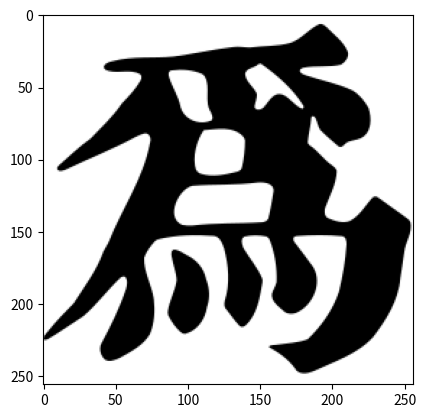

In [ ]:
import matplotlib.pyplot as plt
img_np = svg1.render(
    output_size=(256, 256),     # desired size after rendering
    output_format='L',          # grayscale
    respect_aspect_ratio=False  # use the aspect ratio of output_size instead of original aspect ratio
)

plt.imshow(img_np, cmap="gray")


In [ ]:
to_torch = lambda I: torch.tensor(I, dtype=torch.float32).unsqueeze(0).to(device) / 255

def load_torch(svg_filepath, output_size):
    svg = SVG.load(svg_filepath)
    img_np = svg.render(
        output_size=output_size,    # desired size after rendering
        output_format='L',          # grayscale
        respect_aspect_ratio=False  # use the aspect ratio of output_size instead of original aspect ratio
    )

    return to_torch(img_np)


We load the images:

In [4]:
import numpy as np
import torch
from PIL import Image


# I1 = np.array(Image.open('data/extracted/communities/9/204.jpg'))
# I2 = np.array(Image.open('data/extracted/communities/9/11876.jpg'))



# (C, H, W format)
output_size = (256, 256)
I1_torch = load_torch('data/extracted/communities_clean/59/695.svg', output_size=(256, 256))
I2_torch = load_torch('data/extracted/communities_clean/59/2051.svg', output_size=(256, 256))


NameError: name 'load_torch' is not defined

Now, let's apply the single scale inverse compositional algorithm!

In [14]:
T = single_scale_ic.run(I1=I1_torch, I2=I2_torch)
warped = T.warp(I2_torch.unsqueeze(0)) # warp function signature: (B, C, H, W)
mask = T.visibility_mask(output_size[0], output_size[1], delta=0)
warped[0,0][~mask[0]] = 1

In [13]:
mask.shape

torch.Size([1, 256, 256])

We show the results in this cell:

/tmp/ipykernel_26045/87773010.py:30: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  diff_before = np.abs(im1 - im2)
/tmp/ipykernel_26045/87773010.py:31: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  diff_after = np.abs(warped - im1)


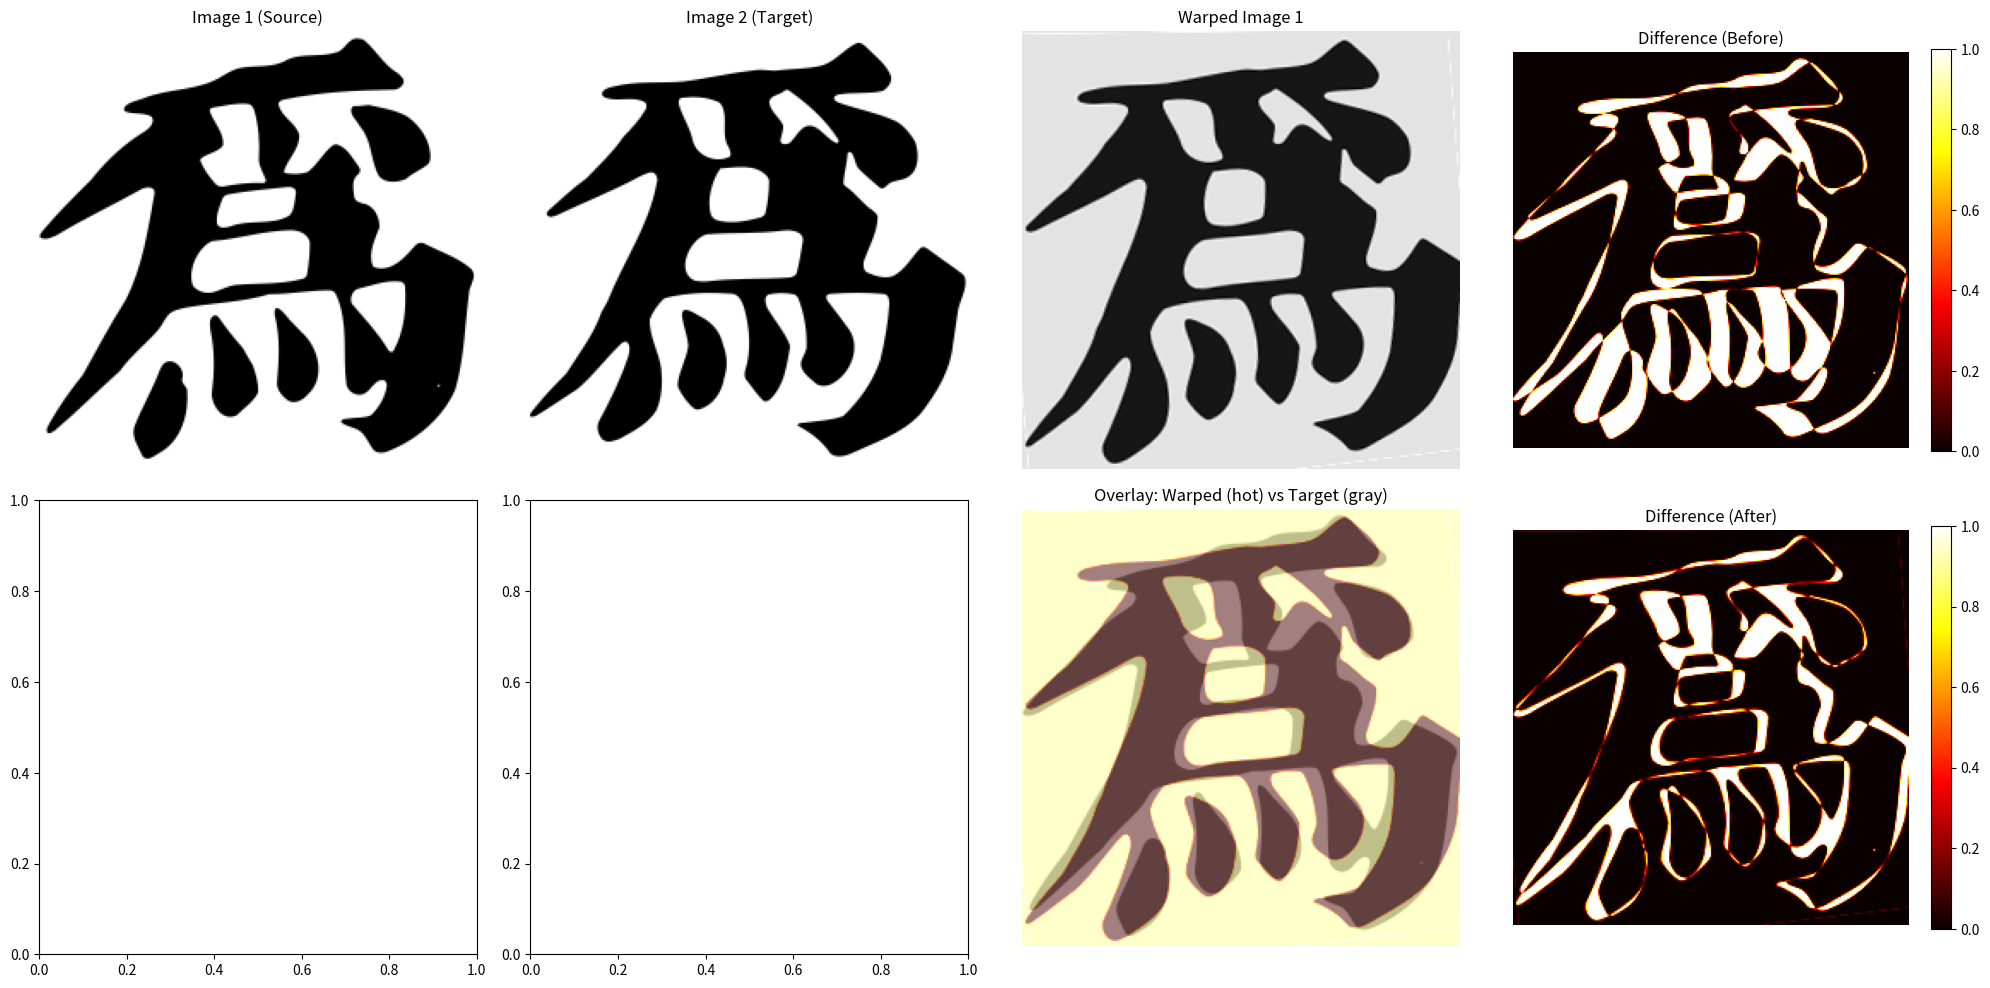


=== Registration Statistics ===
Mean absolute difference (before): 0.2110
Mean absolute difference (after): 0.1503
Improvement: 28.8%


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import map_coordinates

def plot_registration(im1, im2, warped):
    """
    Visualize the registration by showing displacement field and warped image.
    """
    h, w = im1.shape
    
    
    # Plotting
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    
    # Original images
    axes[0, 0].imshow(im1, cmap='gray')
    axes[0, 0].set_title('Image 1 (Source)')
    axes[0, 0].axis('off')
    
    axes[0, 1].imshow(im2, cmap='gray')
    axes[0, 1].set_title('Image 2 (Target)')
    axes[0, 1].axis('off')
    
    # Warped image
    axes[0, 2].imshow(warped, cmap='gray')
    axes[0, 2].set_title('Warped Image 1')
    axes[0, 2].axis('off')
    
    # Difference before warping
    diff_before = np.abs(im1 - im2)
    diff_after = np.abs(warped - im1)

    vmin = min(diff_before.min(), diff_after.min())
    vmax = min(diff_before.max(), diff_after.max())

    diff_after[~mask[0]] = 0

    im_diff_before = axes[0, 3].imshow(diff_before, cmap='hot', vmin=vmin, vmax=vmax)
    axes[0, 3].set_title('Difference (Before)')
    axes[0, 3].axis('off')
    plt.colorbar(im_diff_before, ax=axes[0, 3], fraction=0.046)
    
    
    
    # Overlay: warped vs target
    axes[1, 2].imshow(im1, cmap='gray', alpha=0.5)
    axes[1, 2].imshow(warped, cmap='hot', alpha=0.5)
    axes[1, 2].set_title('Overlay: Warped (hot) vs Target (gray)')
    axes[1, 2].axis('off')
    
    # Difference after warping
    
    im_diff_after = axes[1, 3].imshow(diff_after, cmap='hot', vmin=vmin, vmax=vmax)
    axes[1, 3].set_title('Difference (After)')
    axes[1, 3].axis('off')
    plt.colorbar(im_diff_after, ax=axes[1, 3], fraction=0.046)
    
    plt.tight_layout()
    plt.show()
    
    # Print some statistics
    print(f"\n=== Registration Statistics ===")
    print(f"Mean absolute difference (before): {diff_before.mean():.4f}")
    print(f"Mean absolute difference (after): {diff_after.mean():.4f}")
    print(f"Improvement: {(1 - diff_after.mean()/diff_before.mean())*100:.1f}%")


plot_registration(I1_torch.squeeze(0).cpu(), I2_torch.squeeze(0).cpu(), warped.cpu().squeeze(0).squeeze(0))

## Improved Algorithm

In [18]:
# Create Gaussian pyramid
from src.registration.gaussian_pyramid import GaussianPyramid
gaussian_pyramid = GaussianPyramid(
    eta=0.5,                        # unzooming factor
    sigma_0=0.6,                    # initial std of the gaussian kernel
    ksize_factor=8,                 # kernel size = 2 * sigma * ksize_factor | 1
    min_size=32                     # size of the coarsest image in the pyramid
)

# Create the multiscale registration
multiscale_registration = MultiscaleIC(
    singleScaleIC=single_scale_ic,
    gaussianPyramid=gaussian_pyramid
)

In [19]:
T = multiscale_registration.run(I1=I1_torch, I2=I2_torch)
warped = T.warp(I2_torch.unsqueeze(0)) # warp function signature: (B, C, H, W)
mask = T.visibility_mask(128, 128, delta=0)
warped[0,0][~mask] = 1

plot_registration(I1_torch.squeeze(0).cpu(), I2_torch.squeeze(0).cpu(), warped.cpu().squeeze(0).squeeze(0))

IndexError: too many indices for tensor of dimension 2